In [18]:
import numpy as np
import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 5
batch_size = 600





In [11]:
import matplotlib.pyplot as plt


In [ ]:
#tf.keras.layers.ReLU()

In [2]:
# Import MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_dataset = (
    tf.data.Dataset.from_tensor_slices((tf.reshape(x_train, [-1, 784]), y_train))
    .batch(batch_size)
    .shuffle(1000)
)

train_dataset = (
    train_dataset.map(lambda x, y:
                      (tf.divide(tf.cast(x, tf.float32), 255.0),
                       tf.reshape(tf.one_hot(y, 10), (-1, 10))))
)



11493376/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

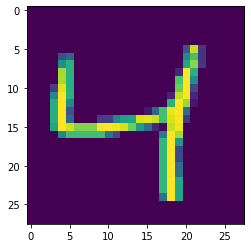

In [14]:
plt.imshow(x_train[2])

In [3]:

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


In [4]:
# Construct model
model = lambda x: tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
# Minimize error using cross entropy
compute_loss = lambda true, pred: tf.reduce_mean(tf.reduce_sum(tf.losses.binary_crossentropy(true, pred), axis=-1))
# caculate accuracy
compute_accuracy = lambda true, pred: tf.reduce_mean(tf.keras.metrics.categorical_accuracy(true, pred))
# Gradient Descent
optimizer = tf.optimizers.Adam(learning_rate)


In [21]:
for i, (x_, y_) in enumerate(train_dataset):
    #print("dataset features",x_[0])
    sample = x_[0]
    print("dataset label", y_[0])
    break

dataset label tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [24]:
for epoch in range(training_epochs):
    for i, (x_, y_) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            pred = model(x_)
            loss = compute_loss(y_, pred)
        acc = compute_accuracy(y_, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
        print("=> loss %.2f acc %.2f" %(loss.numpy(), acc.numpy()))

=> loss 77.76 acc 0.81
=> loss 61.33 acc 0.87
=> loss 67.14 acc 0.85
=> loss 67.35 acc 0.85
=> loss 58.26 acc 0.88
=> loss 54.77 acc 0.88
=> loss 58.64 acc 0.88
=> loss 62.11 acc 0.85
=> loss 70.97 acc 0.81
=> loss 62.05 acc 0.88
=> loss 59.06 acc 0.88
=> loss 56.54 acc 0.88
=> loss 61.23 acc 0.86
=> loss 61.31 acc 0.86
=> loss 58.85 acc 0.88
=> loss 70.00 acc 0.83
=> loss 62.35 acc 0.85
=> loss 68.25 acc 0.82
=> loss 56.85 acc 0.87
=> loss 51.43 acc 0.89
=> loss 62.56 acc 0.84
=> loss 57.19 acc 0.88
=> loss 62.49 acc 0.86
=> loss 52.54 acc 0.90
=> loss 61.58 acc 0.87
=> loss 62.42 acc 0.85
=> loss 65.68 acc 0.86
=> loss 61.34 acc 0.86
=> loss 67.60 acc 0.81
=> loss 47.63 acc 0.92
=> loss 55.76 acc 0.87
=> loss 65.29 acc 0.83
=> loss 58.77 acc 0.85
=> loss 55.86 acc 0.85
=> loss 55.06 acc 0.85
=> loss 45.89 acc 0.92
=> loss 67.06 acc 0.83
=> loss 56.55 acc 0.86
=> loss 58.18 acc 0.84
=> loss 64.06 acc 0.83
=> loss 52.32 acc 0.90
=> loss 54.71 acc 0.87
=> loss 55.91 acc 0.87
=> loss 59.

=> loss 35.17 acc 0.91
=> loss 35.08 acc 0.91
=> loss 28.81 acc 0.92
=> loss 43.21 acc 0.87
=> loss 48.13 acc 0.87
=> loss 31.94 acc 0.92
=> loss 39.48 acc 0.89
=> loss 35.74 acc 0.91
=> loss 41.29 acc 0.89
=> loss 35.80 acc 0.92
=> loss 27.77 acc 0.93
=> loss 30.11 acc 0.93
=> loss 30.49 acc 0.92
=> loss 34.72 acc 0.90
=> loss 33.80 acc 0.91
=> loss 32.13 acc 0.93
=> loss 33.90 acc 0.92
=> loss 34.82 acc 0.91
=> loss 29.86 acc 0.93
=> loss 47.30 acc 0.87
=> loss 30.62 acc 0.92
=> loss 32.99 acc 0.91
=> loss 31.03 acc 0.92
=> loss 23.04 acc 0.94
=> loss 31.59 acc 0.92
=> loss 30.28 acc 0.92
=> loss 33.60 acc 0.91
=> loss 38.03 acc 0.88
=> loss 37.19 acc 0.90
=> loss 41.50 acc 0.88
=> loss 37.43 acc 0.90
=> loss 40.36 acc 0.89
=> loss 42.65 acc 0.88
=> loss 46.26 acc 0.86
=> loss 37.99 acc 0.89
=> loss 36.44 acc 0.90
=> loss 28.24 acc 0.93
=> loss 31.62 acc 0.92
=> loss 45.32 acc 0.87
=> loss 30.93 acc 0.91
=> loss 40.62 acc 0.89
=> loss 27.31 acc 0.93
=> loss 32.65 acc 0.92
=> loss 19.